In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
arr = np.arange(8216)[:, np.newaxis]
arr.shape

(8216, 1)

In [4]:
def get_angles(pos, i, d_model):
  angle_rates = 1 / np.power(10000, (2 * (i//2)) / np.float32(d_model))
  return pos * angle_rates


def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis], #position x 1
                            np.arange(d_model)[np.newaxis, :], # 1 x d_model
                            d_model)

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

(1, 600, 256)


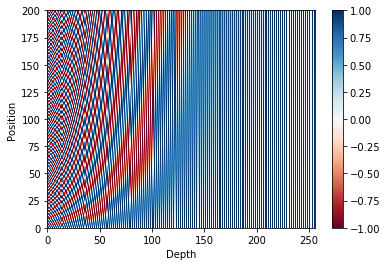

In [17]:
d_model = 256
pos_encoding1 = positional_encoding(200, d_model)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding1[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.colorbar()
plt.show()

(1, 600, 256)


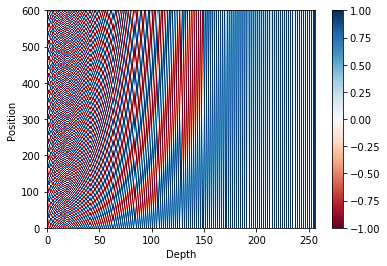

In [18]:
d_model = 256
pos_encoding2 = positional_encoding(600, d_model)
print (pos_encoding.shape)

plt.pcolormesh(pos_encoding2[0], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.colorbar()
plt.show()

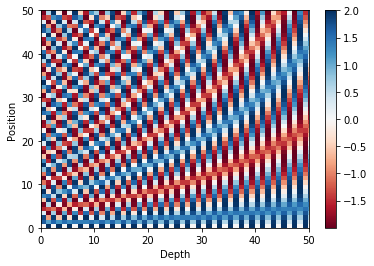

In [21]:

plt.pcolormesh(pos_encoding1[0][:50]+pos_encoding2[0][:50], cmap='RdBu')
plt.xlabel('Depth')
plt.xlim((0, 50))
plt.ylabel('Position')
plt.colorbar()
plt.show()

In [1]:
import tensorflow_datasets as tfds

In [2]:
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en',
                               with_info=True,
                               as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

In [6]:
for eg in train_examples:
    print(eg)
    dfdf

(<tf.Tensor: id=103743, shape=(), dtype=string, numpy=b'os astr\xc3\xb3nomos acreditam que cada estrela da gal\xc3\xa1xia tem um planeta , e especulam que at\xc3\xa9 um quinto deles tem um planeta do tipo da terra que poder\xc3\xa1 ter vida , mas ainda n\xc3\xa3o vimos nenhum deles .'>, <tf.Tensor: id=103744, shape=(), dtype=string, numpy=b"astronomers now believe that every star in the galaxy has a planet , and they speculate that up to one fifth of them have an earth-like planet that might be able to harbor life , but we have n't seen any of them .">)


NameError: name 'dfdf' is not defined

In [7]:
print(tfds.list_builders())


['abstract_reasoning', 'aeslc', 'aflw2k3d', 'amazon_us_reviews', 'bair_robot_pushing_small', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'clevr', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco2014', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'curated_breast_imaging_ddsm', 'cycle_gan', 'deep_weeds', 'definite_pronoun_resolution', 'diabetic_retinopathy_detection', 'downsampled_imagenet', 'dsprites', 'dtd', 'dummy_dataset_shared_generator', 'dummy_mnist', 'emnist', 'eurosat', 'fashion_mnist', 'flores', 'food101', 'gap', 'gigaword', 'glue', 'groove', 'higgs', 'horses_or_humans', 'image_label_folder', 'imagenet2012', 'imagenet2012_corrupted', 'imagenet_resized', 'imdb_reviews', 'iris', 'kitti', 'kmnist', 'lfw', 'lm1b', 'lsun', 'malaria', 'mnist'

In [16]:
train_dataset1 = tf.data.Dataset.from_tensor_slices([1,2,3])

In [17]:
train_dataset2 = tf.data.Dataset.from_tensor_slices([1,2,3])

In [18]:
train_dataset = tf.data.Dataset.zip((train_dataset1, train_dataset2))


In [19]:
for i in train_dataset:
    print(i)

(<tf.Tensor: id=103762, shape=(), dtype=int32, numpy=1>, <tf.Tensor: id=103763, shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: id=103764, shape=(), dtype=int32, numpy=2>, <tf.Tensor: id=103765, shape=(), dtype=int32, numpy=2>)
(<tf.Tensor: id=103766, shape=(), dtype=int32, numpy=3>, <tf.Tensor: id=103767, shape=(), dtype=int32, numpy=3>)
